In [1]:
import os
import cv2
from scipy import ndimage
from skimage import filters
import numpy as np
from matplotlib import pyplot as plt
from os import listdir

<h2> Importing and Resizing the Images </h2>

In [2]:
#Path of the Mask folders
dir_path = ''

#Import Images
mask_folder_path = os.path.join(dir_path,'mask')
mask_folder = sorted(listdir(mask_folder_path))
nomask_folder_path = os.path.join(dir_path,'without_mask')
nomask_folder = sorted(listdir(nomask_folder_path))


In [3]:
mask_images = []
nomask_images = []
img_size = 224

#With Mask
for im in mask_folder:
    mask_image_path = os.path.join(mask_folder_path, im)
    #Load image
    image = cv2.imread(mask_image_path)
    #Resize all to img_size x img_size
    resized=cv2.resize(image,(img_size,img_size))
    mask_images.append(resized)
  
#No Mask
for im in nomask_folder:
    nomask_image_path = os.path.join(nomask_folder_path, im)
    #Load image
    image = cv2.imread(nomask_image_path)
    #Resize all to img_size x img_size
    resized=cv2.resize(image,(img_size,img_size))
    nomask_images.append(resized)

In [4]:
#Sample image plot
cv2.imshow('image', mask_images[0]) 
cv2.waitKey(10000)
cv2.destroyAllWindows()

<h1>Feature 1</h1>

<h2> Converting to Grayscale </h2> 

In [5]:
gray_mask_images = []
gray_nomask_images = []

#With Mask
for im in mask_images:
    #Convert to Grayscale
    colored = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    gray_mask_images.append(colored)
  
#No Mask
for im in nomask_images:
    #Convert to Grayscale
    colored = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    gray_nomask_images.append(colored)

In [6]:
#Sample image plot
cv2.imshow('image', gray_mask_images[0]) 
cv2.waitKey(10000)
cv2.destroyAllWindows()

<h2> Prewitt Edge Detection</h2>

In [7]:
prewitt_hori = np.array([[-1, -1, -1],
                   [0,  0, 0],
                   [1, 1, 1]])
prewitt_vert = np.array([[-1, 0, 1],
                   [-1,  0, 1],
                   [-1, 0, 1]])

In [8]:
#Perform image edge detection
mask_img_hori = []
mask_img_vert = []
mask_img_edge = []

nomask_img_hori = []
nomask_img_vert = []
nomask_img_edge = []


#With Mask
for img in gray_mask_images:
    mask_img_hori.append(filters.prewitt_h(img))
    mask_img_vert.append(filters.prewitt_v(img))
    
    
count = 0
for im_hori in mask_img_hori:
    mask_img_edge.append(np.hypot(im_hori, mask_img_vert[count]))
    count = count + 1
    
    
#No Mask
for img in gray_nomask_images:
    nomask_img_hori.append(filters.prewitt_h(img))
    nomask_img_vert.append(filters.prewitt_v(img))
    
count = 0
for im_hori in nomask_img_hori:
    nomask_img_edge.append(np.hypot(im_hori, nomask_img_vert[count]))
    count = count + 1

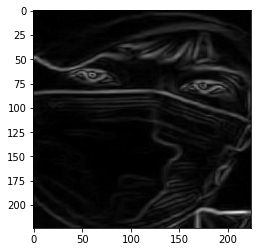

In [9]:
plt.imshow(mask_img_edge[0],'gray')

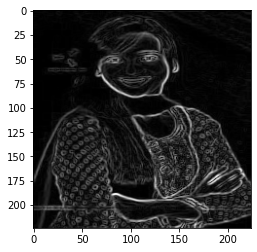

In [10]:
plt.imshow(nomask_img_edge[0],'gray')

<h2> Thresholding </h2>

In [11]:
#Perform thresholding
nomask_img_th = []
mask_img_th = []
thval = 0.04

for img in mask_img_edge:
    retval, new_img_th = cv2.threshold(img, thval, 255, cv2.THRESH_BINARY)
    mask_img_th.append(new_img_th)


for img in nomask_img_edge:
    retval, new_img_th = cv2.threshold(img, thval, 255, cv2.THRESH_BINARY)
    nomask_img_th.append(new_img_th)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e6c3b61948>)

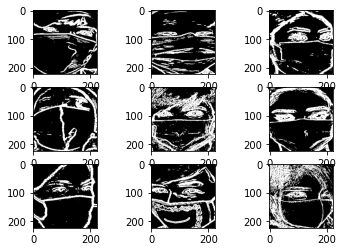

In [12]:
plt.subplot(331), plt.imshow(mask_img_th[0],'gray')
plt.subplot(332), plt.imshow(mask_img_th[1],'gray')
plt.subplot(333), plt.imshow(mask_img_th[2],'gray')
plt.subplot(334), plt.imshow(mask_img_th[3],'gray')
plt.subplot(335), plt.imshow(mask_img_th[4],'gray')
plt.subplot(336), plt.imshow(mask_img_th[5],'gray')
plt.subplot(337), plt.imshow(mask_img_th[6],'gray')
plt.subplot(338), plt.imshow(mask_img_th[7],'gray')
plt.subplot(339), plt.imshow(mask_img_th[8],'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e6c3e38508>)

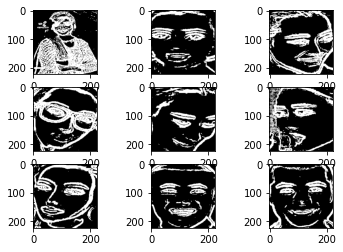

In [13]:
plt.subplot(331), plt.imshow(nomask_img_th[0],'gray')
plt.subplot(332), plt.imshow(nomask_img_th[1],'gray')
plt.subplot(333), plt.imshow(nomask_img_th[2],'gray')
plt.subplot(334), plt.imshow(nomask_img_th[3],'gray')
plt.subplot(335), plt.imshow(nomask_img_th[4],'gray')
plt.subplot(336), plt.imshow(nomask_img_th[5],'gray')
plt.subplot(337), plt.imshow(nomask_img_th[6],'gray')
plt.subplot(338), plt.imshow(nomask_img_th[7],'gray')
plt.subplot(339), plt.imshow(nomask_img_th[8],'gray')

<h2>Getting the Mean, Std, Var and Skew of the Prewitt Images</h2>

In [14]:
data=[]

for image in mask_img_th: 
    features = np.reshape(image, (img_size*img_size))
    data.append(features)
    
for image in nomask_img_th: 
    features = np.reshape(image, (img_size*img_size))
    data.append(features)

data=np.array(data)/255.0
print(data.shape)

(3833, 50176)


In [15]:
from scipy import stats

data_mean = np.mean(data, axis = 1) 
data_std = np.std(data, axis = 1) 
data_var = np.var(data, axis = 1) 
data_skew = stats.skew(data, axis = 1) 

print(data_mean)
print(data_std)
print(data_var)
print(data_skew)

[0.19327966 0.19399713 0.23481346 ... 0.59859295 0.48975606 0.49681122]
[0.3948704  0.39542666 0.42388217 ... 0.49018306 0.49989505 0.49998983]
[0.15592263 0.15636224 0.1796761  ... 0.24027943 0.24989506 0.24998983]
[ 1.55352413  1.54770986  1.25122763 ... -0.40226993  0.04098437
  0.01275536]


<h2>Converting Images to Dataframes Where Features = Stats (Prewitt Images)</h2>

In [16]:
#Create array with mask=1 and no_mask=0
target=[]
num_mask = len(mask_img_th)
num_nomask = len(nomask_img_th)

for i in range(0,num_mask):
    target.append(1)
    
for i in range(0,num_nomask):
    target.append(0)
    
target=np.array(target)

print(target[0])

1


In [17]:
import pandas as pd

target_column_names = ['mask'] 
target_df = pd.DataFrame(data = target, columns = target_column_names)

In [18]:
target_df

,mask
0,1
1,1
2,1
3,1
4,1
...,...
3828,0
3829,0
3830,0
3831,0


In [19]:
merged_data = {'mean':data_mean, 'std':data_std, 'var':data_var,'skew':data_skew}

data_df = pd.DataFrame(data = merged_data)

In [20]:
data_result = pd.concat([data_df, target_df], axis=1, sort=False)
data_result

,mean,std,var,skew,mask
0,0.193280,0.394870,0.155923,1.553524,1
1,0.193997,0.395427,0.156362,1.547710,1
2,0.234813,0.423882,0.179676,1.251228,1
3,0.213588,0.409839,0.167968,1.397679,1
4,0.347158,0.476067,0.226639,0.642104,1
...,...,...,...,...,...
3828,0.794583,0.404006,0.163221,-1.458311,0
3829,0.560088,0.496376,0.246389,-0.242109,0
3830,0.598593,0.490183,0.240279,-0.402270,0
3831,0.489756,0.499895,0.249895,0.040984,0


In [21]:
#datav2_result.to_csv('datav2_images.csv')

<h1>Feature 2</h1>

<h2>Canny Edge Detection</h2>

In [22]:
canny_img = []

for img in mask_images:
    edges = cv2.Canny(img,img_size,img_size)
    reshape = edges.reshape(-1)
    canny_img.append(reshape)
    
    
for img in nomask_images:
    edges = cv2.Canny(img,img_size,img_size)
    reshape = edges.reshape(-1)
    canny_img.append(reshape)
    
    
canny_img=np.array(canny_img)/255.0

<h2>Getting the Mean, Std, Var and Skew of the Canny Images</h2>

In [23]:
canny_img_mean = np.mean(canny_img, axis = 1) 
canny_img_std = np.std(canny_img, axis = 1) 
canny_img_var = np.var(canny_img, axis = 1) 
canny_img_skew = stats.skew(canny_img, axis = 1) 

print(canny_img_mean)
print(canny_img_std)
print(canny_img_var)
print(canny_img_skew)

[0.00522162 0.01271524 0.00866948 ... 0.12133291 0.03409997 0.03451849]
[0.07207187 0.11204269 0.09270557 ... 0.32651376 0.18148598 0.18255675]
[0.00519435 0.01255356 0.00859432 ... 0.10661123 0.03293716 0.03332697]
[13.73013836  8.69819792 10.59980527 ...  2.31945567  5.1342813
  5.09958131]


<h2>Converting Images to Dataframes Where Features = Stats (Canny Images) </h2>

In [24]:
merged_data = {'canny_mean':canny_img_mean, 'canny_std':canny_img_std, 'canny_var':canny_img_var,'canny_skew':canny_img_skew}

canny_df = pd.DataFrame(data = merged_data)

In [25]:
canny_df

,canny_mean,canny_std,canny_var,canny_skew
0,0.005222,0.072072,0.005194,13.730138
1,0.012715,0.112043,0.012554,8.698198
2,0.008669,0.092706,0.008594,10.599805
3,0.012038,0.109054,0.011893,8.949024
4,0.030552,0.172102,0.029619,5.455466
...,...,...,...,...
3828,0.173589,0.378756,0.143456,1.723597
3829,0.113899,0.317689,0.100926,2.430688
3830,0.121333,0.326514,0.106611,2.319456
3831,0.034100,0.181486,0.032937,5.134281


In [26]:
canny_result = pd.concat([canny_df, target_df], axis=1, sort=False)
canny_result

,canny_mean,canny_std,canny_var,canny_skew,mask
0,0.005222,0.072072,0.005194,13.730138,1
1,0.012715,0.112043,0.012554,8.698198,1
2,0.008669,0.092706,0.008594,10.599805,1
3,0.012038,0.109054,0.011893,8.949024,1
4,0.030552,0.172102,0.029619,5.455466,1
...,...,...,...,...,...
3828,0.173589,0.378756,0.143456,1.723597,0
3829,0.113899,0.317689,0.100926,2.430688,0
3830,0.121333,0.326514,0.106611,2.319456,0
3831,0.034100,0.181486,0.032937,5.134281,0


In [27]:
#canny_result.to_csv('canny_images.csv')

<h1>Feature 3</h1>

<h2>Getting the BGR Layers</h2>

In [28]:
img_b = []
img_g = []
img_r = []

#Mask Images
for im in mask_images:
    bgr_b = im[:,:,2]
    bgr_g = im[:,:,1]
    bgr_r = im[:,:,0]
    
    reshape_b = bgr_b.reshape(-1)
    reshape_g = bgr_g.reshape(-1)
    reshape_r = bgr_r.reshape(-1)  
    
    img_b.append(reshape_b)
    img_g.append(reshape_g)
    img_r.append(reshape_r)
    

#No Mask Images
for im in nomask_images:
    bgr_b = im[:,:,2]
    bgr_g = im[:,:,1]
    bgr_r = im[:,:,0]
    
    reshape_b = bgr_b.reshape(-1)
    reshape_g = bgr_g.reshape(-1)
    reshape_r = bgr_r.reshape(-1)  
    
    img_b.append(reshape_b)
    img_g.append(reshape_g)
    img_r.append(reshape_r)
    

    
img_b=np.array(img_b)/255.0
img_g=np.array(img_g)/255.0
img_r=np.array(img_r)/255.0

<h2>Getting the Mean, Std, Var and Skew of the Images' BGR</h2>

In [29]:
img_b_mean = np.mean(img_b, axis = 1) 
img_b_std = np.std(img_b, axis = 1) 
img_b_var = np.var(img_b, axis = 1) 
img_b_skew = stats.skew(img_b, axis = 1) 


print(img_b_mean)
print(img_b_std)
print(img_b_var)
print(img_b_skew)

[0.57131298 0.41956228 0.69096482 ... 0.61176424 0.66830451 0.66842518]
[0.26252624 0.18565209 0.25044015 ... 0.32254814 0.36883957 0.36910633]
[0.06892003 0.0344667  0.06272027 ... 0.1040373  0.13604263 0.13623949]
[-0.85612452 -0.68157667 -0.81662147 ... -0.55883366 -0.75662033
 -0.75506666]


In [30]:
img_g_mean = np.mean(img_g, axis = 1) 
img_g_std = np.std(img_g, axis = 1) 
img_g_var = np.var(img_g, axis = 1) 
img_g_skew = stats.skew(img_g, axis = 1) 


print(img_g_mean)
print(img_g_std)
print(img_g_var)
print(img_g_skew)

[0.61026731 0.4440155  0.68989205 ... 0.52620431 0.64023602 0.63958576]
[0.28595207 0.26198067 0.30410877 ... 0.29464268 0.38076568 0.38006562]
[0.08176859 0.06863387 0.09248214 ... 0.08681431 0.1449825  0.14444987]
[-0.56176982 -0.26822005 -0.69932791 ... -0.3357361  -0.59087914
 -0.58989771]


In [31]:
img_r_mean = np.mean(img_r, axis = 1) 
img_r_std = np.std(img_r, axis = 1) 
img_r_var = np.var(img_r, axis = 1) 
img_r_skew = stats.skew(img_r, axis = 1) 


print(img_r_mean)
print(img_r_std)
print(img_r_var)
print(img_r_skew)

[0.6518051  0.46402272 0.65632519 ... 0.51727918 0.62097824 0.62218153]
[0.30500364 0.30478193 0.32357191 ... 0.28885584 0.38725938 0.38785508]
[0.09302722 0.09289203 0.10469878 ... 0.0834377  0.14996982 0.15043156]
[-0.50487026 -0.20393074 -0.62895943 ... -0.28465173 -0.48358004
 -0.48523438]


<h2>Converting Images to Dataframes Where Features = Stats (BGR Images) </h2>

In [32]:
merged_data = {'b_mean':img_b_mean, 'b_std':img_b_std, 'b_var':img_b_var,'b_skew':img_b_skew}

b_df = pd.DataFrame(data = merged_data)

In [33]:
b_df

,b_mean,b_std,b_var,b_skew
0,0.571313,0.262526,0.068920,-0.856125
1,0.419562,0.185652,0.034467,-0.681577
2,0.690965,0.250440,0.062720,-0.816621
3,0.620038,0.275387,0.075838,0.114060
4,0.569388,0.316354,0.100080,-0.368490
...,...,...,...,...
3828,0.656667,0.266853,0.071211,-0.627489
3829,0.578163,0.345890,0.119640,-0.454878
3830,0.611764,0.322548,0.104037,-0.558834
3831,0.668305,0.368840,0.136043,-0.756620


In [34]:
merged_data = {'g_mean':img_g_mean, 'g_std':img_g_std, 'g_var':img_g_var,'g_skew':img_g_skew}

g_df = pd.DataFrame(data = merged_data)

In [35]:
g_df

,g_mean,g_std,g_var,g_skew
0,0.610267,0.285952,0.081769,-0.561770
1,0.444015,0.261981,0.068634,-0.268220
2,0.689892,0.304109,0.092482,-0.699328
3,0.580402,0.296452,0.087884,0.170642
4,0.557789,0.320269,0.102572,-0.197610
...,...,...,...,...
3828,0.576067,0.257206,0.066155,-0.342463
3829,0.493898,0.311142,0.096809,-0.250399
3830,0.526204,0.294643,0.086814,-0.335736
3831,0.640236,0.380766,0.144982,-0.590879


In [36]:
merged_data = {'r_mean':img_r_mean, 'r_std':img_r_std, 'r_var':img_r_var,'r_skew':img_r_skew}

r_df = pd.DataFrame(data = merged_data)

In [37]:
r_df

,r_mean,r_std,r_var,r_skew
0,0.651805,0.305004,0.093027,-0.504870
1,0.464023,0.304782,0.092892,-0.203931
2,0.656325,0.323572,0.104699,-0.628959
3,0.597236,0.293364,0.086063,0.096563
4,0.557730,0.324559,0.105338,-0.141203
...,...,...,...,...
3828,0.566817,0.252456,0.063734,-0.247788
3829,0.485228,0.304569,0.092762,-0.216155
3830,0.517279,0.288856,0.083438,-0.284652
3831,0.620978,0.387259,0.149970,-0.483580


In [38]:
img_bgr_result = pd.concat([b_df, g_df, r_df, target_df], axis=1, sort=False)
img_bgr_result

,b_mean,b_std,b_var,b_skew,g_mean,g_std,g_var,g_skew,r_mean,r_std,r_var,r_skew,mask
0,0.571313,0.262526,0.068920,-0.856125,0.610267,0.285952,0.081769,-0.561770,0.651805,0.305004,0.093027,-0.504870,1
1,0.419562,0.185652,0.034467,-0.681577,0.444015,0.261981,0.068634,-0.268220,0.464023,0.304782,0.092892,-0.203931,1
2,0.690965,0.250440,0.062720,-0.816621,0.689892,0.304109,0.092482,-0.699328,0.656325,0.323572,0.104699,-0.628959,1
3,0.620038,0.275387,0.075838,0.114060,0.580402,0.296452,0.087884,0.170642,0.597236,0.293364,0.086063,0.096563,1
4,0.569388,0.316354,0.100080,-0.368490,0.557789,0.320269,0.102572,-0.197610,0.557730,0.324559,0.105338,-0.141203,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,0.656667,0.266853,0.071211,-0.627489,0.576067,0.257206,0.066155,-0.342463,0.566817,0.252456,0.063734,-0.247788,0
3829,0.578163,0.345890,0.119640,-0.454878,0.493898,0.311142,0.096809,-0.250399,0.485228,0.304569,0.092762,-0.216155,0
3830,0.611764,0.322548,0.104037,-0.558834,0.526204,0.294643,0.086814,-0.335736,0.517279,0.288856,0.083438,-0.284652,0
3831,0.668305,0.368840,0.136043,-0.756620,0.640236,0.380766,0.144982,-0.590879,0.620978,0.387259,0.149970,-0.483580,0


In [39]:
#img_bgr_result.to_csv('bgr_images.csv')

<h1>Feature 4</h1>

<h2>GLCM</h2>

In [77]:
from skimage.feature import greycomatrix, greycoprops

In [78]:
contrast = []
correlation = []
dissimilarity = []
energy = []
ASM = []
homogeneity = []

for im in gray_mask_images:
    g = greycomatrix(im, [3], [0, ((np.pi/2) + np.pi/4)], levels=256, normed=True, symmetric=True)
    
    g_contrast = greycoprops(g, 'contrast')[0, 0]
    reshape_contrast = g_contrast.reshape(-1)
    contrast.append(reshape_contrast)
    
    g_correlation = greycoprops(g, 'correlation')[0, 0]
    reshape_correlation = g_correlation.reshape(-1)
    correlation.append(reshape_correlation)
    
    g_dissimilarity = greycoprops(g, 'dissimilarity')[0, 0]
    reshape_dissimilarity = g_dissimilarity.reshape(-1)
    dissimilarity.append(reshape_dissimilarity)
    
    g_energy = greycoprops(g, 'energy')[0, 0]
    reshape_energy = g_energy.reshape(-1)
    energy.append(reshape_energy)
    
    g_ASM = greycoprops(g, 'ASM')[0, 0]
    reshape_ASM = g_ASM.reshape(-1)
    ASM.append(reshape_ASM)
    
    g_homogeneity = greycoprops(g, 'homogeneity')[0, 0]
    reshape_homogeneity = g_homogeneity.reshape(-1)
    homogeneity.append(reshape_homogeneity)
    
for im in gray_nomask_images:
    g = greycomatrix(im, [3], [0, ((np.pi/2) + np.pi/4)], levels=256, normed=True, symmetric=True)
    
    g_contrast = greycoprops(g, 'contrast')[0, 0]
    reshape_contrast = g_contrast.reshape(-1)
    contrast.append(reshape_contrast)
    
    g_correlation = greycoprops(g, 'correlation')[0, 0]
    reshape_correlation = g_correlation.reshape(-1)
    correlation.append(reshape_correlation)
    
    g_dissimilarity = greycoprops(g, 'dissimilarity')[0, 0]
    reshape_dissimilarity = g_dissimilarity.reshape(-1)
    dissimilarity.append(reshape_dissimilarity)
    
    g_energy = greycoprops(g, 'energy')[0, 0]
    reshape_energy = g_energy.reshape(-1)
    energy.append(reshape_energy)
    
    g_ASM = greycoprops(g, 'ASM')[0, 0]
    reshape_ASM = g_ASM.reshape(-1)
    ASM.append(reshape_ASM)

    g_homogeneity = greycoprops(g, 'homogeneity')[0, 0]
    reshape_homogeneity = g_homogeneity.reshape(-1)
    homogeneity.append(reshape_homogeneity)

<h2>Normalization</h2>

In [85]:
from sklearn.preprocessing import normalize

contrast = normalize(contrast, axis=0, norm='max')
correlation = normalize(correlation, axis=0, norm='max')
dissimilarity = normalize(dissimilarity, axis=0, norm='max')
energy = normalize(energy, axis=0, norm='max')
ASM = normalize(ASM, axis=0, norm='max')
homogeneity = normalize(homogeneity, axis=0, norm='max')

<h2>Converting Images to Dataframes Where Features = Texture</h2>

In [86]:
gclm_contrast = pd.DataFrame(data=contrast, columns=['contrast'])
gclm_correlation = pd.DataFrame(data=correlation, columns=['correlation'])
gclm_dissimilarity = pd.DataFrame(data=dissimilarity, columns=['dissimilarity'])
gclm_energy = pd.DataFrame(data=energy, columns=['energy'])
gclm_ASM = pd.DataFrame(data=ASM, columns=['ASM'])
gclm_homogeneity = pd.DataFrame(data=homogeneity, columns=['homogeneity'])
glcm_df = pd.concat([gclm_contrast, gclm_correlation, gclm_dissimilarity, gclm_energy, gclm_ASM, gclm_homogeneity], axis=1, sort=False)
glcm_df

,contrast,correlation,dissimilarity,energy,ASM,homogeneity
0,0.013332,0.996856,0.108318,0.110454,0.012200,0.547112
1,0.013347,0.994628,0.098447,0.037243,0.001387,0.456429
2,0.036902,0.986431,0.181434,0.036890,0.001361,0.338114
3,0.049787,0.983035,0.194622,0.102886,0.010586,0.414035
4,0.093375,0.972163,0.298515,0.025722,0.000662,0.230964
...,...,...,...,...,...,...
3828,0.432834,0.784063,0.777016,0.011110,0.000123,0.066447
3829,0.390400,0.875179,0.619286,0.151200,0.022861,0.247640
3830,0.389769,0.858419,0.635630,0.076039,0.005782,0.186485
3831,0.252763,0.944361,0.459030,0.033215,0.001103,0.121514


<h1>Combining All Features</h1>

In [87]:
final_result = pd.concat([data_df, canny_df, b_df, g_df, r_df, glcm_df, target_df], axis=1, sort=False)
final_result

,mean,std,var,skew,canny_mean,canny_std,canny_var,canny_skew,b_mean,b_std,...,r_std,r_var,r_skew,contrast,correlation,dissimilarity,energy,ASM,homogeneity,mask
0,0.193280,0.394870,0.155923,1.553524,0.005222,0.072072,0.005194,13.730138,0.571313,0.262526,...,0.305004,0.093027,-0.504870,0.013332,0.996856,0.108318,0.110454,0.012200,0.547112,1
1,0.193997,0.395427,0.156362,1.547710,0.012715,0.112043,0.012554,8.698198,0.419562,0.185652,...,0.304782,0.092892,-0.203931,0.013347,0.994628,0.098447,0.037243,0.001387,0.456429,1
2,0.234813,0.423882,0.179676,1.251228,0.008669,0.092706,0.008594,10.599805,0.690965,0.250440,...,0.323572,0.104699,-0.628959,0.036902,0.986431,0.181434,0.036890,0.001361,0.338114,1
3,0.213588,0.409839,0.167968,1.397679,0.012038,0.109054,0.011893,8.949024,0.620038,0.275387,...,0.293364,0.086063,0.096563,0.049787,0.983035,0.194622,0.102886,0.010586,0.414035,1
4,0.347158,0.476067,0.226639,0.642104,0.030552,0.172102,0.029619,5.455466,0.569388,0.316354,...,0.324559,0.105338,-0.141203,0.093375,0.972163,0.298515,0.025722,0.000662,0.230964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,0.794583,0.404006,0.163221,-1.458311,0.173589,0.378756,0.143456,1.723597,0.656667,0.266853,...,0.252456,0.063734,-0.247788,0.432834,0.784063,0.777016,0.011110,0.000123,0.066447,0
3829,0.560088,0.496376,0.246389,-0.242109,0.113899,0.317689,0.100926,2.430688,0.578163,0.345890,...,0.304569,0.092762,-0.216155,0.390400,0.875179,0.619286,0.151200,0.022861,0.247640,0
3830,0.598593,0.490183,0.240279,-0.402270,0.121333,0.326514,0.106611,2.319456,0.611764,0.322548,...,0.288856,0.083438,-0.284652,0.389769,0.858419,0.635630,0.076039,0.005782,0.186485,0
3831,0.489756,0.499895,0.249895,0.040984,0.034100,0.181486,0.032937,5.134281,0.668305,0.368840,...,0.387259,0.149970,-0.483580,0.252763,0.944361,0.459030,0.033215,0.001103,0.121514,0


In [88]:
final_result.to_csv('final_images.csv')

<h3> Getting .npy files for CNN </h3>

In [ ]:
compiled_images = mask_images + nomask_images
compiled_images = np.array(compiled_images)

from numpy import save

save('data.npy', compiled_images)
save('target.npy', final_result['mask'])